In [1]:
# !pip install gensim
# !pip install python-Levenshtein

In [2]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json("Cell_Phones_and_Accessories_5.json",lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
df.shape

(194439, 9)

In [5]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [6]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

### Parameters details
window = 10 => 10 words before the current word and 10 words after

min_count = 2 => every sentence should have atleast two words

workers = 4 => number of threads in CPUs



In [7]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count=2,
    workers=4
)

In [8]:
model.build_vocab(review_text, progress_per=1000)

In [9]:
model.epochs #default value is 5

5

In [10]:
model.corpus_count

194439

In [11]:
model.train(review_text, total_examples = model.corpus_count, epochs = model.epochs)

(61508109, 83868975)

In [12]:
model.save('./word2vec-amazon-cell-accessories-reviews-short.model')

In [13]:
model.wv.most_similar('bad')

[('shabby', 0.6717192530632019),
 ('terrible', 0.6601771116256714),
 ('horrible', 0.5982851982116699),
 ('good', 0.5964136719703674),
 ('awful', 0.5612288117408752),
 ('okay', 0.5507086515426636),
 ('funny', 0.532914400100708),
 ('ridiculous', 0.5307028293609619),
 ('cheap', 0.5243798494338989),
 ('poor', 0.5130624175071716)]

In [14]:
model.wv.most_similar('good')

[('decent', 0.8260265588760376),
 ('great', 0.7774407863616943),
 ('nice', 0.6827502250671387),
 ('fantastic', 0.6820496916770935),
 ('excellent', 0.6423470377922058),
 ('outstanding', 0.6228724122047424),
 ('superb', 0.6146485805511475),
 ('exceptional', 0.6083528399467468),
 ('awesome', 0.5997729897499084),
 ('bad', 0.5964137315750122)]

In [15]:
model.wv.most_similar('car')

[('vehicle', 0.8678823709487915),
 ('truck', 0.7409306764602661),
 ('van', 0.705238938331604),
 ('cars', 0.6647294163703918),
 ('jeep', 0.662992537021637),
 ('honda', 0.6483478546142578),
 ('ford', 0.6444475650787354),
 ('rv', 0.6398205757141113),
 ('suv', 0.6321527361869812),
 ('mazda', 0.6296778321266174)]

In [16]:
model.wv.similarity(w1 = 'cheap', w2 = 'inexpensive')

0.5248229

In [17]:
model.wv.similarity(w1 = 'jeep', w2 = 'car')

0.6629926

In [24]:
def plot_word_similarities(word):
    # Get the most similar words and their similarities
    sims = pd.DataFrame(model.wv.most_similar(word), columns=['word', 'similarity'])
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    sims.plot.barh(x='word', y='similarity', ax=ax)
    plt.xlabel('Similarity')
    plt.ylabel('Word')
    plt.title(f'Similarities to "{word}"')
    plt.show()

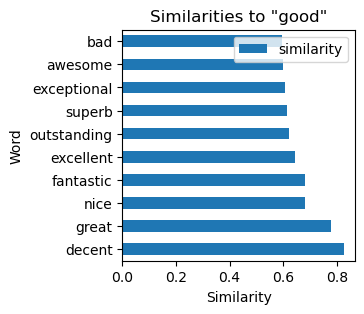

In [25]:
plot_word_similarities('good')

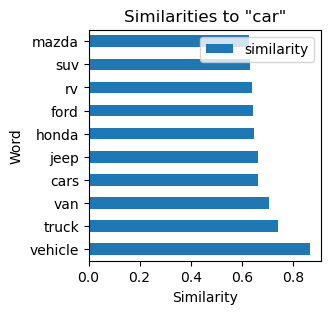

In [27]:
plot_word_similarities('car')

In [38]:
def plot_two_word_similarity(word1, word2):
    similarity = model.wv.similarity(w1=word1, w2=word2)
    
    # Data for plotting
    words = [word1, word2]
    similarities = [similarity, similarity]  # Same similarity value for both words to form a bar

    # Plotting
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.barh(words, similarities, color='Green')
    ax.set_xlim(0, 1)  # Similarity ranges between 0 and 1
    ax.set_xlabel('Similarity')
    ax.set_title(f'Similarity between "{word1}" and "{word2}"')
    plt.show()

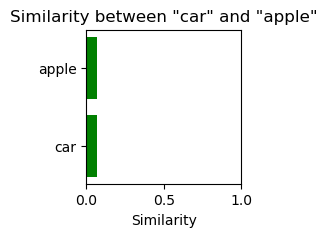

In [39]:
plot_two_word_similarity('car', 'apple')